In [42]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

In [48]:
r = joblib.load('../data/r.pkl')
s = joblib.load('../data/s.pkl')
t = joblib.load('../data/t.pkl')
d = r.append(s, ignore_index=True)
q = d.append(t, ignore_index=True)

In [49]:
q['target'].value_counts()

3    1052
6    1052
2    1052
5    1052
1    1052
0    1052
4    1016
Name: target, dtype: int64

In [50]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=20, bootstrap=True)

In [51]:
y, X = q['target'], q.drop('target', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       334
           1       0.82      0.93      0.87       298
           2       0.96      0.84      0.89       329
           3       0.88      0.85      0.86       312
           4       0.91      0.95      0.93       308
           5       0.91      0.86      0.88       316
           6       0.86      0.91      0.88       302

    accuracy                           0.89      2199
   macro avg       0.89      0.89      0.89      2199
weighted avg       0.89      0.89      0.89      2199



In [54]:
xgb = xgb.XGBClassifier(**{
    'learning_rate': 0.03,
    'n_estimators': 100,
    'max_depth': 4,
    'subsample': 0.8,
    'gamma': 0.1,
    'colsample_bytree': 0.7
})

In [55]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.03, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [56]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       334
           1       0.68      0.87      0.76       298
           2       0.97      0.78      0.86       329
           3       0.86      0.78      0.82       312
           4       0.88      0.90      0.89       308
           5       0.83      0.83      0.83       316
           6       0.80      0.85      0.82       302

    accuracy                           0.83      2199
   macro avg       0.84      0.83      0.83      2199
weighted avg       0.84      0.83      0.83      2199



In [57]:
import scikitplot as skplt
import matplotlib.pyplot as plt

c:\users\piank\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


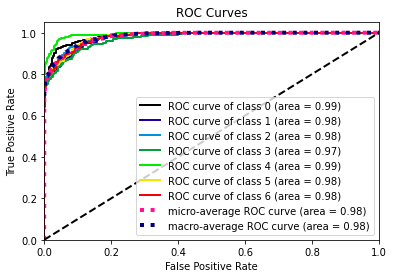

In [58]:
skplt.metrics.plot_roc_curve(y_test, xgb.predict_proba(X_test))

c:\users\piank\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


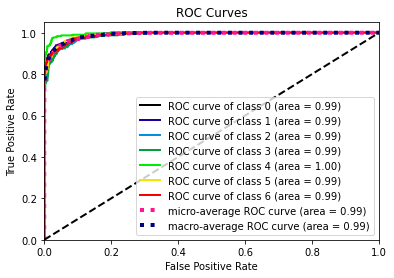

In [59]:
skplt.metrics.plot_roc_curve(y_test, rfc.predict_proba(X_test))